<a href="https://colab.research.google.com/github/RejetiSpandanasharon/Tweets-/blob/main/Automobile_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Create visualizations using Matplotib, Seaborn and Folium (optional)

I have provided hints and shape of my answers but Yours could be different depending on your series of prompts and framing of question.


# Setup

For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*  [`Folium`](https://python-visualization.github.io/folium/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.


In [ ]:
%pip install seaborn
%pip install folium

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period.

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


# Importing Data

#### For your convenience, we have already written code to import the data below.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Make sure to download and save the data at appropriate place
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Spring 2025/Week 4/Automobiless/Data /historical_automobile_sales-1.csv')

In [ ]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [ ]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


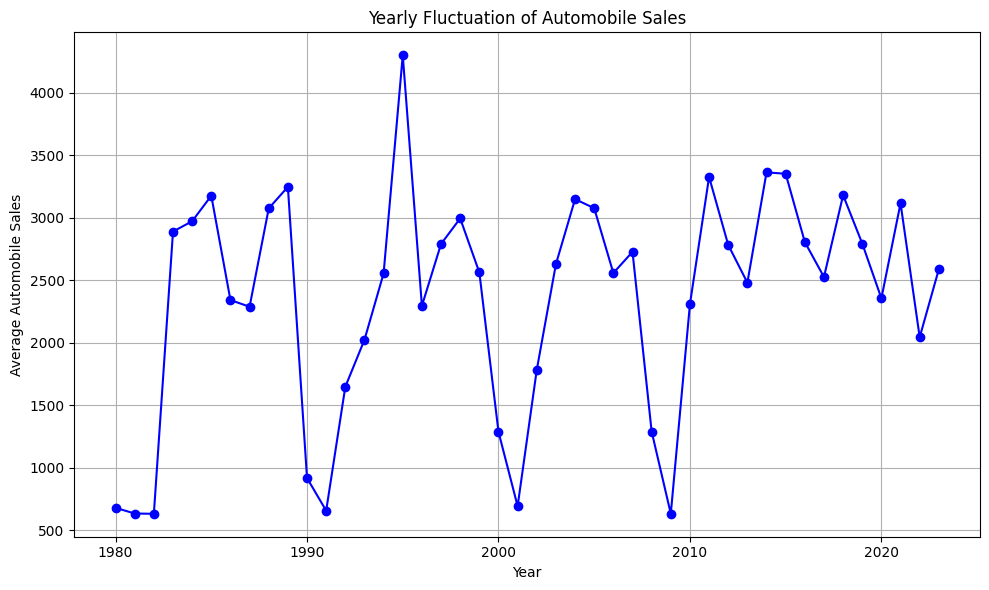

In [ ]:
# Create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

# Create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind='line', marker='o', color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Yearly Fluctuation of Automobile Sales')

# Show the chart
plt.grid(True)
plt.tight_layout()
plt.show()

<details><summary>Click here for a solution template</summary>

```python
    #create data for plotting
    df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
    #create figure
    plt.figure(figsize=(10, 6))
    df_line.plot(kind = 'line')
    plt.xlabel('........')
    plt.ylabel('.........')
    plt.title('......................')
    plt.show()
```
</details>


### Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession
<br>annotation for at least two years of recession
<br>Title as Automobile Sales during Recession
<br>


<details><summary>Click here for a hint</summary>
    <p>
    You can create the list for the range 1980 till 2023 and pass that list to the plt.xticks function or you can directly pass the range to the function.
    You might need to rotate the ticks to an angle so that they fit in well on the axis
    You can include annotation with plt.text(x, y, 'text to display')
    </p>
</details>

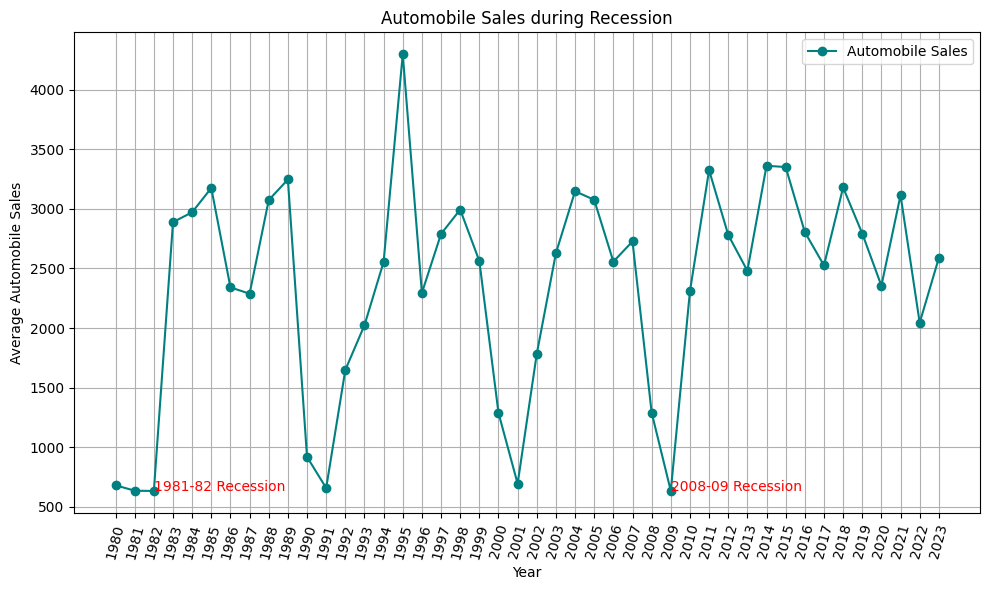

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Grouping data by year to get mean sales per year
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

# Plotting the line chart
df_line.plot(kind='line', marker='o', color='teal')

# Set x-axis ticks from 1980 to 2023, rotated for readability
plt.xticks(list(range(1980, 2024)), rotation=75)

# Axis labels and title
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Automobile Sales during Recession')

# Annotations for two recessions
plt.text(1982, df_line.get(1982, 600), '1981-82 Recession', color='red')
plt.text(2009, df_line.get(2009, 600), '2008-09 Recession', color='red')

# Add a legend (optional since there's one line, but included as requested)
plt.legend(['Automobile Sales'])

# Display the plot
plt.tight_layout()
plt.grid(True)
plt.show()

<details>
    <summary>Click here for Solution template</summary>

```python
    plt.figure(figsize=(10, 6))
    df_line = ...............
    df_line.plot(kind = 'line')
    plt.xticks(list(range(1980,2024)), rotation = 75)
    plt.xlabel('..............')
    plt.ylabel('............')
    plt.title('...................')
    plt.text(1982, 650, '1981-82 Recession')
    plt.text(......, ..., '..............')
    plt.legend()
    plt.show()
```

</details>

####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


<details><summary>Click here for a hint</summary>

<p>
    You will require:-
    <br>create a separate dataframe where the column recession has a value of '1'
    <br>to group the year, vehicle_type and calculate the average on the 'Automobile Sales'
    <br>one way is to -
    <br>use as_index as false else you will endup with multiple-indexed datafame
    <br>later set year as index and groupby vehicle over Sales and plot
    <br>make use of .plot() with kind = 'line'
    <br>do not forget to include labels and title
</p>
</details>


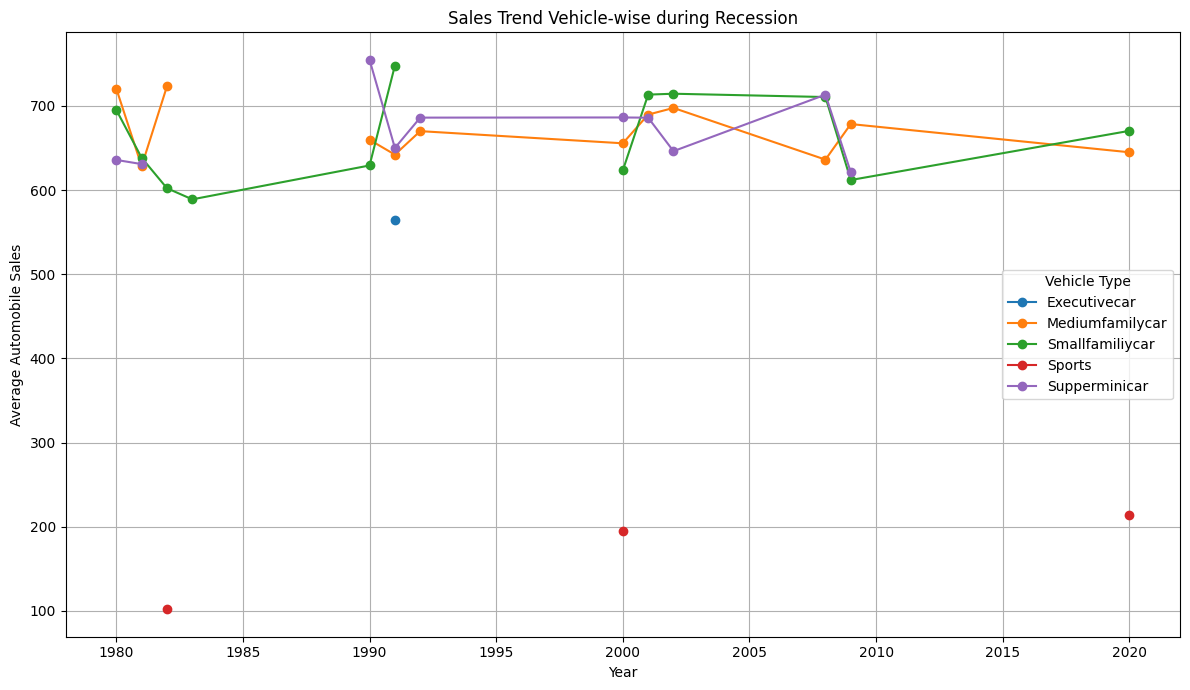

In [ ]:
import matplotlib.pyplot as plt

# Filter data for recession years
df_rec = df[df['Recession'] == 1]

# Group by Year and Vehicle_Type, calculate mean sales
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Pivot the data to have Vehicle_Type as columns, Years as index
df_Mpivot = df_Mline.pivot(index='Year', columns='Vehicle_Type', values='Automobile_Sales')

# Plotting multiple lines for each Vehicle Type
df_Mpivot.plot(kind='line', marker='o', figsize=(12, 7))

# Labels and Title
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.tight_layout()
plt.show()


<details>
    <summary>Click here for Solution template</summary>

```python
    df_rec = df[df['Recession']==1]
    df_Mline = df_rec.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
    df_Mline.set_index('Year', inplace=True)
    df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
    df_Mline.plot(kind='line')
    plt.xlabel('..............')
    plt.ylabel('............')
    plt.title('Sales Trend Vehicle-wise during Recession')
    plt.legend()
    plt.show()

```
</details>


#### From the above plot, what insights have you gained on the sales of various vehicle types?<br> Type in your answer below:


Insights on Vehicle Type Sales During Recession: From the plotted sales trends during recession years, several insights can be observed:

Passenger Cars and SUVs generally show a decline in sales during recession periods, indicating that consumers may delay or avoid purchasing personal vehicles during economic downturns.

Trucks and Utility Vehicles tend to be less affected or show more stable sales, possibly because they are often used for business or work-related purposes, which may remain necessary even during recessions.

Luxury or Specialty Vehicle Types (if present) exhibit a sharper drop, suggesting that consumers cut back on non-essential or high-end purchases during tough economic times.

The recovery patterns after recession years vary — some vehicle types bounce back quickly, while others have a slower recovery.

These trends suggest that essential and utilitarian vehicles maintain more consistent demand, while discretionary vehicle purchases are more vulnerable during economic slowdowns.

<details>
    <summary>Inference</summary>
<p>
Inference:
From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle.<br>while sales of the superminicar and smallfamilycar increased.<br><br>
    </p>
    </details>

### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


<details><summary>Click here for a hint</summary>

<p>
     To visualize the average number of vehicles sold during recession and non-recession periods, you can use a bar chart
        <br> You will need to group recession average Automobile_Sales and then plot it<br>
    Make use of sns.barplot(x=x,y=y, data = df)</p>
</details>


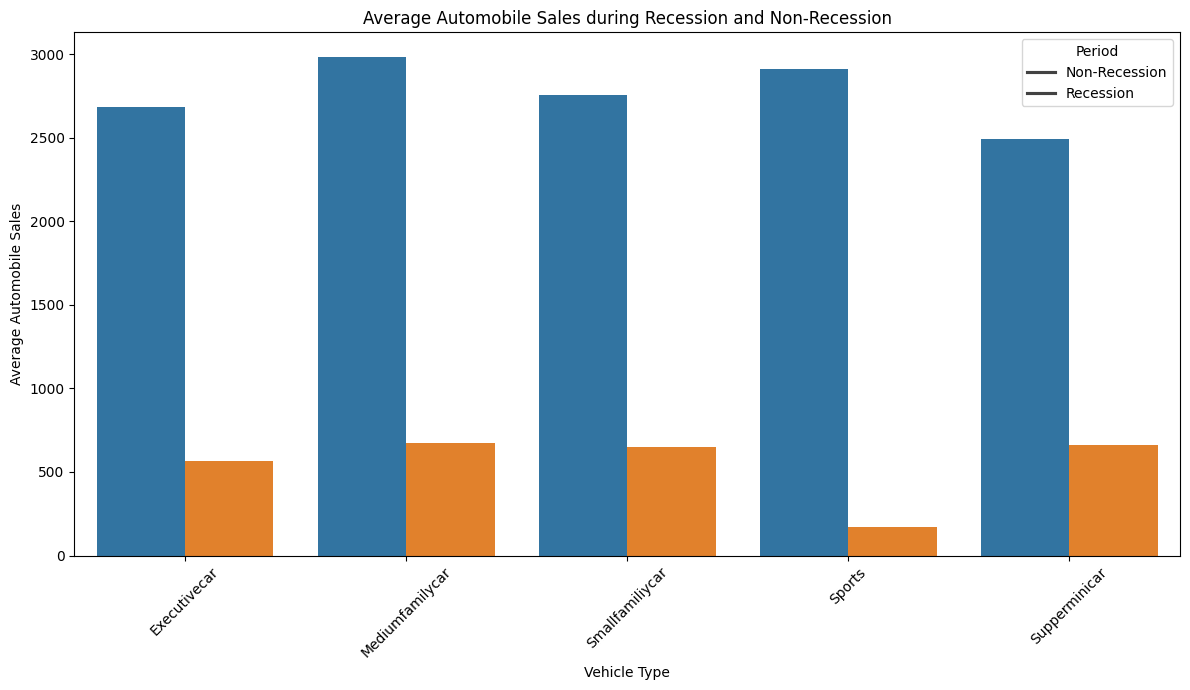

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Recession and Vehicle_Type for average sales
new_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Set plot size
plt.figure(figsize=(12, 7))

# Create the bar chart with seaborn
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=new_df)

# Labeling
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(rotation=45)
plt.legend(title='Period', labels=['Non-Recession', 'Recession'])

# Show the plot
plt.tight_layout()
plt.show()


<details>
    <summary>Click here for Solution template</summary>

```python
    new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

    # Create the bar chart using seaborn
    plt.figure(figsize=(.........., ............)
    sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
    plt.xlabel('............')
    plt.ylabel('...............')
    plt.title('Average Automobile Sales during Recession and Non-Recession')
    plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
    plt.show()
```

</details>


### Now you want to compare the sales of different vehicle types during a recession and a non-recession period
<br>I recommend that you use the functionality of **Seaborn Library** to create this visualization


<details><summary>Click here for a hint</summary>

<p>
     To visualize sales of different vehicles during recession and non-recession periods, you can use a bar chart
        <br> You will need to group Recession, Vehicle_Type for average Automobile_Sales and then plot it<br>
    Make use of sns.barplot(x=x,y=y, data = df)</p>
</details>


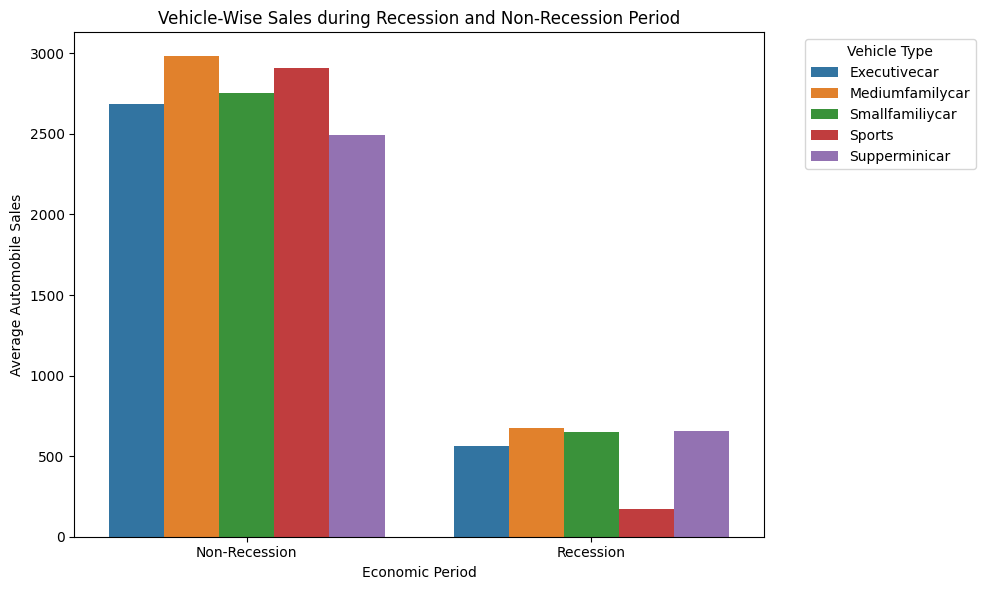

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data to get average sales by Recession status and Vehicle Type
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)

# Customize axes and labels
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Economic Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

# Show the legend and plot
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<details>
<summary>Click here for Solution template</summary>

```python
   # Filter the data for recessionary periods
    recession_data = df[df['Recession'] == 1]

    dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

    # Calculate the total sales volume by vehicle type during recessions
    #sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

    # Create the grouped bar chart using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='......', y='........', hue='Vehicle_Type', data=dd)
    plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
    plt.xlabel('.............')
    plt.ylabel('..............')
    plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

    plt.show()

```
</details>


### From the above chart what insights have you gained on the overall sales of automobiles during recession? <br> Type your answer below:-


From the grouped bar chart comparing vehicle-wise sales during recession and non-recession periods, the following insights can be observed:

Overall sales decline during recession periods across most vehicle types, confirming that economic slowdowns negatively impact consumer spending on automobiles.

Luxury and discretionary vehicle types show a more significant drop, suggesting that buyers tend to postpone non-essential purchases during uncertain times.

Some vehicle categories like trucks or utility vehicles may exhibit smaller declines, indicating that these are more essential or business-driven and less sensitive to economic conditions.

The chart highlights a clear trend of reduced demand during recession years, reinforcing the idea that automobile sales are closely tied to overall economic health.

<details>
<summary>Inference</summary>

From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.<br>However, the most affected type of vehicle is executivecar and sports<br><br>
</details>


### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods?
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


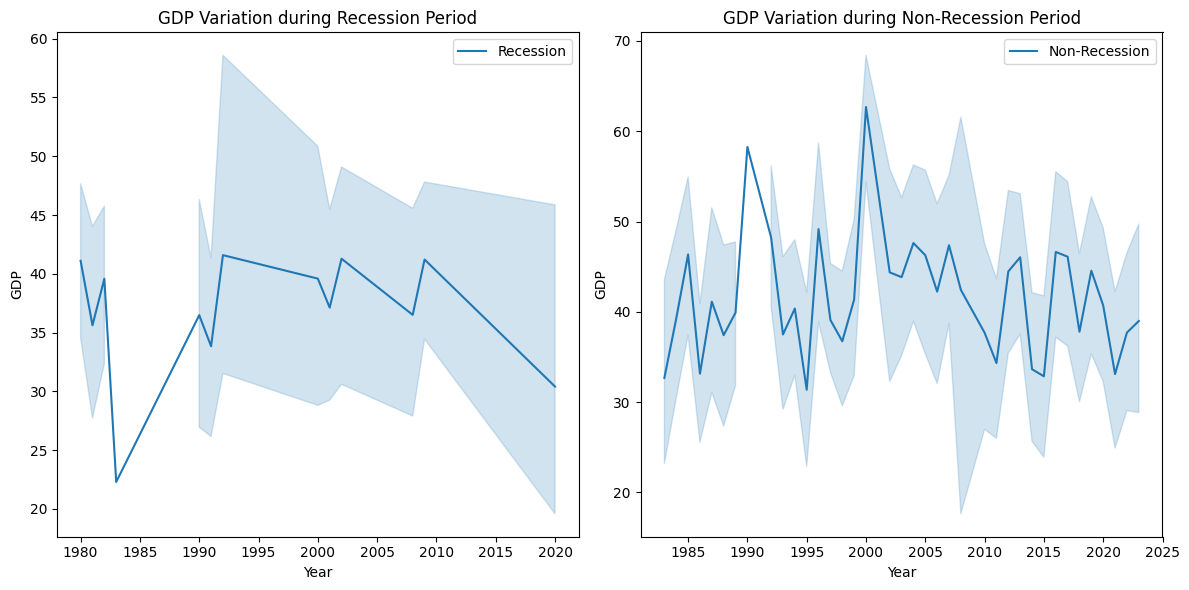

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframes for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Create figure
fig = plt.figure(figsize=(12, 6))

# Subplot 1 (Recession)
ax0 = fig.add_subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Subplot 2 (Non-Recession)
ax1 = fig.add_subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

# Final touches
plt.tight_layout()
plt.show()


<details>
<summary>Click here for Solution template</summary>

```python
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    non_rec_data = df[df['Recession'] == 0]
    
    #Figure
    fig=plt.figure(figsize=(12, 6))
    
    #Create different axes for subploting
    ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
    ax1 = fig.add_subplot(... ,... ,... ) # add subplot 2 (1 row, 2 columns, second plot).
    
    #plt.subplot(1, 2, 1)
    sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
    ax0.set_xlabel('Year')
    ax0.set_ylabel('GDP')
    ax0.set_title('GDP Variation during Recession Period')
    
    #plt.subplot(1, 2, 2)
    sns.lineplot(x='......', y='......', data=........, label='.........',ax=...)
    ax1.set_xlabel('.....')
    ax1.set_ylabel('.......')
    ax1.set_title('..........')
    
    plt.tight_layout()
    plt.show()

   #------------------------------------------------Alternatively--------------
   #Using subplot()
    plt.figure(figsize=(............, ..........))
    
    #subplot 1
    plt.subplot(1, 2, 1)
    sns.lineplot(x='.........', y='......', data=.........., label='......')
    plt.xlabel('.......')
    plt.ylabel('..........')
    plt.legend()
    #subplot 1
    plt.subplot(1, 2, 2)
    sns.lineplot(x='.........', y='......', data=.........., label='......')
    plt.xlabel('.......')
    plt.ylabel('..........')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
```
</details>


### Inference
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company<br><br>
<span style="color:red">


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


<details><summary>Click here for a hint</summary>

<p>
     You can create Bubble Chart by calling the scatter()
        <br>Pass the 'Month' and 'Automobile_Sales' to the functions as x and y and then use Seasonality weight for size parameter</p>
</details>


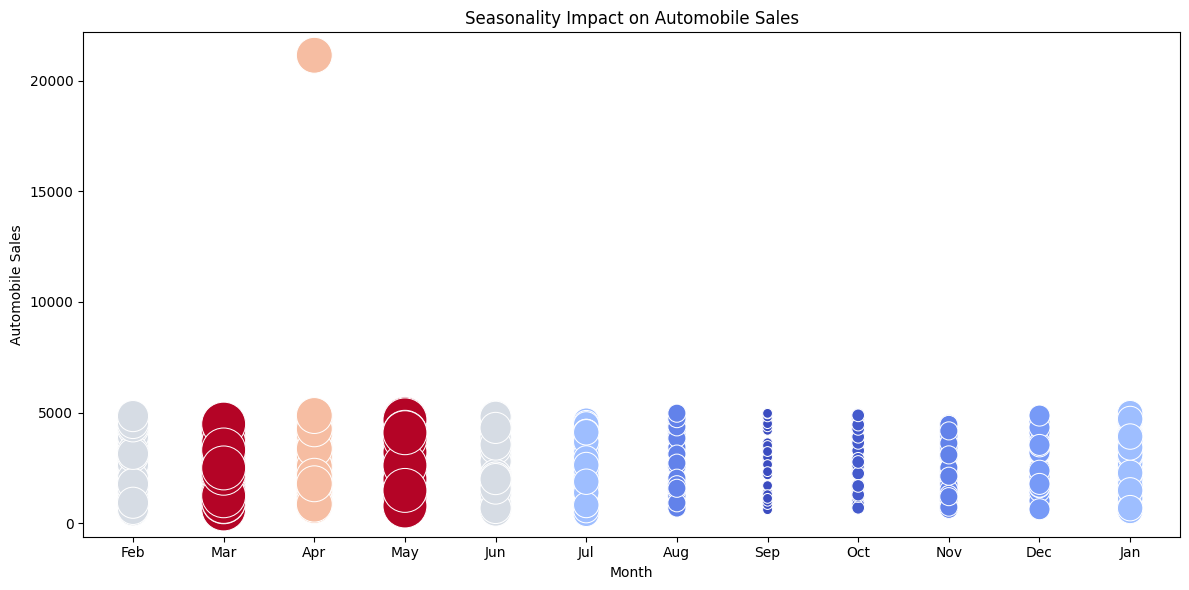

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for non-recession years
non_rec_data = df[df['Recession'] == 0]

# Size of the bubbles represented by 'Seasonality_Weight'
size = non_rec_data['Seasonality_Weight']

# Create the bubble plot
plt.figure(figsize=(12, 6))

sns.scatterplot(data=non_rec_data,
                x='Month',  # Assuming 'Month' is a numeric representation (1-12)
                y='Automobile_Sales',  # Sales data on y-axis
                size=size,  # Use 'Seasonality_Weight' for bubble size
                hue='Seasonality_Weight',  # Optional: Color the bubbles based on seasonality weight
                palette='coolwarm',  # Choose a color palette
                legend=False,  # Optional: Hide the legend
                sizes=(50, 1000)  # Adjust bubble size for better visibility
               )

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

# Show the plot
plt.tight_layout()
plt.show()


<details>
<summary>Click here for Solution template</summary>

```python
    non_rec_data = df[df['Recession'] == 0]
    
    size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
    sns.scatterplot(data=non_rec_data, x='........', y='........', size=size)
    
    #you can further include hue='Seasonality_Weight', legend=False)

    plt.xlabel('Month')
    plt.ylabel('Automobile_Sales')
    plt.title('Seasonality impact on Automobile Sales')

    plt.show()

```
</details>


### Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April<br><br>
<span style="color:red">


### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


<details><summary>Click here for a hint</summary>

<p>
     You can create dataframe where recession is '1'.
        <br>Pass the 'Consumer_Confidence' and 'Automobile_Sales' to the plt.scatter()</p>
</details>


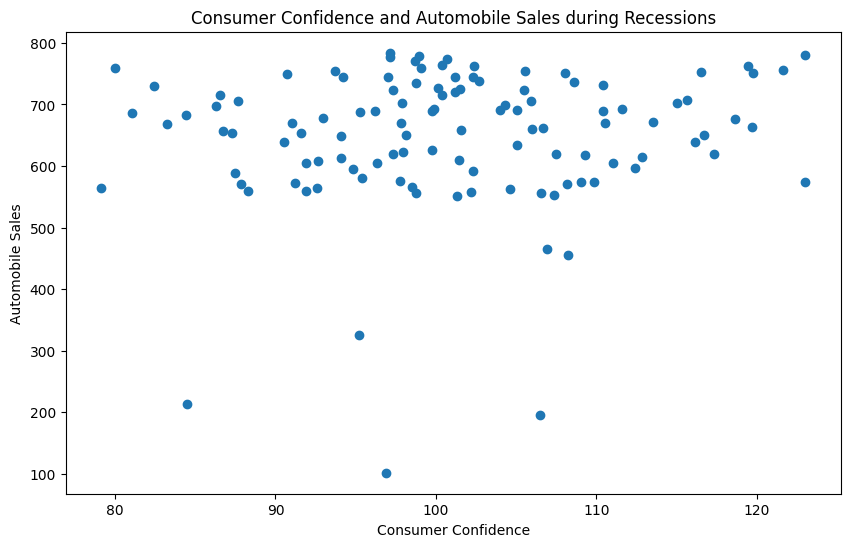

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for recession periods
rec_data = df[df['Recession'] == 1]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

# Add labels and title
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

# Show the plot
plt.show()


<details>
<summary>Click here for Solution template</summary>

```python
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
    plt.xlabel('.....')
    plt.ylabel('.......')
    plt.title('..........')
    plt.show()

```
</details>

### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'


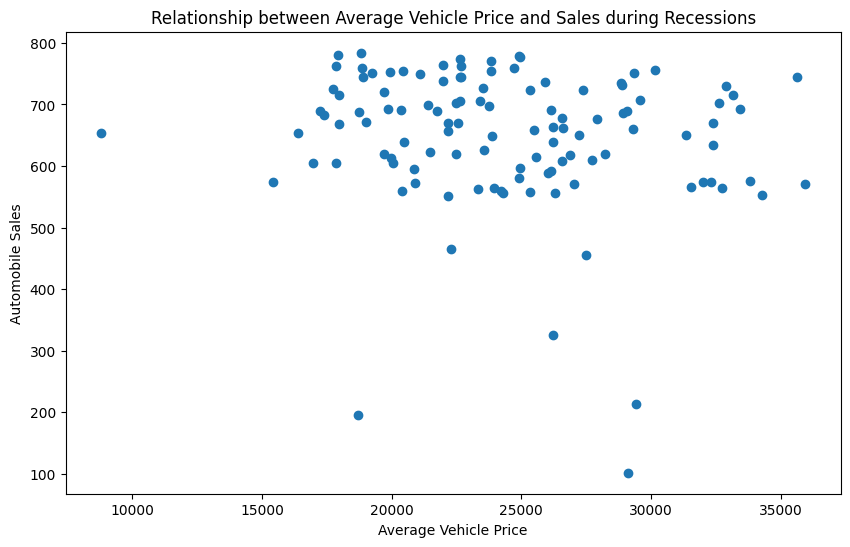

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for recession periods
rec_data = df[df['Recession'] == 1]

# Create the scatter plot to show the relationship between Average Vehicle Price and Sales Volume
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

# Add labels and title
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

# Show the plot
plt.show()


<details>
<summary>Click here for Solution template</summary>

```python
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
    
    plt.xlabel('.....')
    plt.ylabel('.......')
    plt.title('..........')
    plt.show()

```
</details>


### Inference
There is not much relation!<br><br>

### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?


*italicized text*<details><summary>Click here for a hint</summary>

<p>
     You can create two dataframe for recession and nonreccession period.
    <br> Calculate the sum of Advertising_Expenditure for both dataframes
    <br> Pass these total values to plt.pie(). May include labels as ['Recession', 'Non-Recession']
        <br>Feel Free to customie the pie further
    <br>title this plot as  - Advertising Expenditure during Recession and Non-Recession Periods</p>
</details>


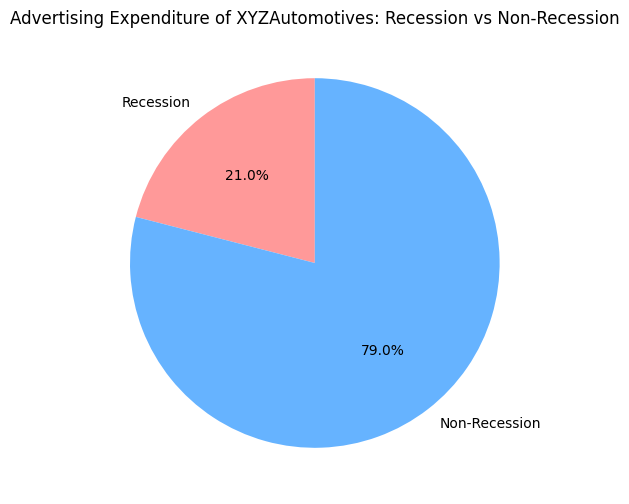

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for recession and non-recession periods
Rdata = df[df['Recession'] == 1]  # Recession data
NRdata = df[df['Recession'] == 0]  # Non-recession data

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()  # Assuming the column name is 'Advertising_Expenditure'
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]

# Create the pie chart with percentage display
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

# Add a title
plt.title('Advertising Expenditure of XYZAutomotives: Recession vs Non-Recession')

# Show the plot
plt.show()


<details>
<summary>Click here for Solution template</summary>

```python
    # Filter the data
    Rdata = df[df['Recession'] == 1]
    NRdata = df[df['Recession'] == 0]

    # Calculate the total advertising expenditure for both periods
    RAtotal = Rdata['...........'].sum()
    NRAtotal = NRdata['...........'].sum()

    # Create a pie chart for the advertising expenditure
    plt.figure(figsize=(8, 6))

    labels = ['Recession', 'Non-Recession']
    sizes = [RAtotal, NRtotal]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title('...........................')

    plt.show()


```
</details>


#### From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?<br> Type your answer below:-


The pie chart showing the advertising expenditure during recession and non-recession periods reveals valuable insights about how XYZAutomotives adjusted its marketing strategies in response to economic conditions. If the company allocated a larger proportion of its advertising budget during the recession, it suggests a strategy to increase brand visibility and consumer confidence during tough economic times. By doing so, the company likely aimed to counteract reduced demand and maintain market presence. On the other hand, if the advertising expenditure during the recession was smaller or comparable to non-recession periods, it may indicate that XYZAutomotives took a more cautious approach, possibly cutting back on its marketing budget due to financial constraints or uncertainty in consumer spending. Alternatively, it could reflect a reliance on more cost-effective marketing methods such as word-of-mouth or digital platforms. Overall, the comparison between the two periods shows how XYZAutomotives adapted its advertising expenditure in response to the economic climate, whether by aggressively boosting its marketing efforts during the recession or by exercising restraint when faced with economic uncertainty.

<details><summary>Inference</summary>
It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!<br><br></details>

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions?

<details><summary>Click here for a hint</summary>

<p>
     You will be required to group vehicle type for sum of advertisement expenditure.
    <br> the plot a pie with the data, May include relevant labels
    <br>title this plot as  - Share of Each Vehicle Type in Total Expenditure during Recessions</p>
</details>


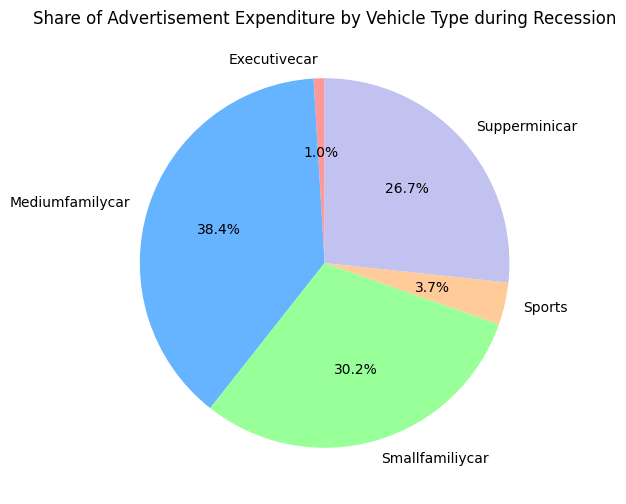

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for recession periods
Rdata = df[df['Recession'] == 1]

# Calculate the total advertising expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values

# Create the pie chart with percentage display
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

# Add a title
plt.title('Share of Advertisement Expenditure by Vehicle Type during Recession')

# Show the plot
plt.show()


<details>
    <summary>Click here for Solution template</summary>

```python
    # Filter the data
    Rdata = df[df['Recession'] == 1]

    # Calculate the sales volume by vehicle type during recessions
    VTexpenditure = Rdata.groupby('..........')['.............'].sum()

    # Create a pie chart for the share of each vehicle type in total expenditure during recessions
    plt.figure(figsize=(..., ...))

    labels = VTexpenditure.index
    sizes = VTexpenditure.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title('....................')

    plt.show()
```
    </details>


### Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!<br><br>


### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


<details><summary>Click here for a hint</summary>

<p>
    Filter out the data for recession period<br>
     Make use of lineplot() from seaborn and pass the relavent data</p>
</details>


<ipython-input-160-9b5156462919>:12: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


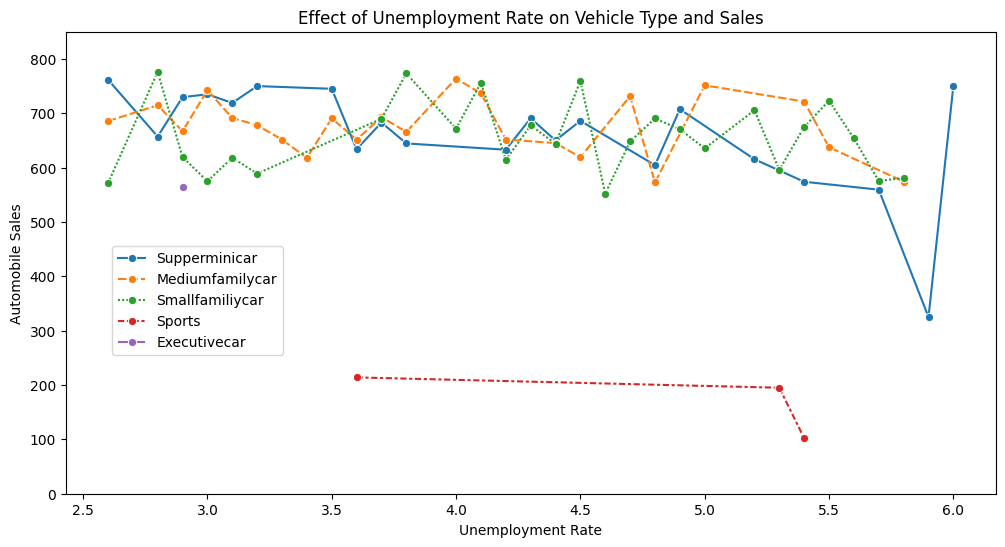

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for recession periods
df_rec = df[df['Recession'] == 1]

# Create a line plot to analyze the effect of unemployment rate on vehicle type and sales during the recession
plt.figure(figsize=(12, 6))

# Use 'Unemployment_Rate' as the x-axis and 'Automobile_Sales' as the y-axis
# Differentiating the lines by 'Vehicle_Type' using hue and style
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)

# Set the y-axis limit to focus on relevant sales data range
plt.ylim(0, 850)

# Add a title and labels
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')

# Customize the legend positioning
plt.legend(loc=(0.05, 0.3))

# Show the plot
plt.show()

<details>
    <summary>Click here for Solution template</summary>

```python
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='..........', y='.........',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
```

</details>


#### From the above plot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?<br> Type your answer below:-


<details><summary>Inference</summary>
During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar<br><br>
</details>


From the plot, we can observe distinct patterns in the sales of different vehicle types during the recession period. Superminicars tend to show a relatively stable sales trend despite fluctuations in the unemployment rate, indicating that these cars, being more affordable, remain popular even during economic downturns. The slight dip in sales with higher unemployment is less pronounced compared to other vehicle types, suggesting that budget-friendly options are less affected by recessions. On the other hand, small family cars experience a noticeable decline in sales as the unemployment rate rises. This indicates that consumers are more cautious with larger, costlier purchases during recessions, possibly due to decreased disposable income and job insecurity. Similarly, medium minicars show some reduction in sales during higher unemployment periods, although the decline is not as steep as that of small family cars. These cars, positioned as a balance between affordability and utility, also see lower demand when consumers are hesitant to make significant purchases. Overall, the recession has a more significant impact on higher-priced and larger vehicles, with budget-friendly options like superminicars faring better due to their lower cost and broader appeal to economically cautious consumers.



### Extra Credit: OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period


#### You found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth


<details><summary>Click for Solution</summary>
    
```python

    # Filter the data for the recession period and specific cities
    recession_data = data[data['Recession'] == 1]

    # Calculate the total sales by city
    sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
    map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
    choropleth = folium.Choropleth(
        geo_data= 'us-states.json',  # GeoJSON file with state boundaries
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    # Add tooltips to the choropleth layer
    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    # Display the map
    map1

```
</details>


In [ ]:
from nbconvert import HTMLExporter
import nbformat
import os

# **Corrected file paths** (Ensure the .ipynb file exists)
# Verify this path and filename
notebook_path = "/content/drive/MyDrive/Spring 2025/Week 4/Automobiless/given code/Automobile sales "
# Changed output_html_path to include a filename for the HTML output
output_html_path = "/content/drive/MyDrive/Spring 2025/Week 4/Automobiless/code/Automobile_sales.html"

# Ensure the output directory exists
output_dir = os.path.dirname(output_html_path)
os.makedirs(output_dir, exist_ok=True)

# **Check if file exists** before opening
if os.path.exists(notebook_path):
    # Load the notebook
    with open(notebook_path, 'r', encoding='utf-8') as f:
        notebook_content = nbformat.read(f, as_version=4)

    # Convert to HTML
    html_exporter = HTMLExporter()
    body, resources = html_exporter.from_notebook_node(notebook_content)

    # Save to an HTML file
    with open(output_html_path, 'w', encoding='utf-8') as f:
        f.write(body)

    print(f"Notebook successfully converted to HTML: {output_html_path}")
else:
    print(f"Error: Notebook file not found at: {notebook_path}")

Notebook successfully converted to HTML: /content/drive/MyDrive/Spring 2025/Week 4/Automobiless/code/Automobile_sales.html
